# 1D Tsunami Propagation
##### Nicholas Oselette, Shanty Papakosta

##### Video Walkthrough

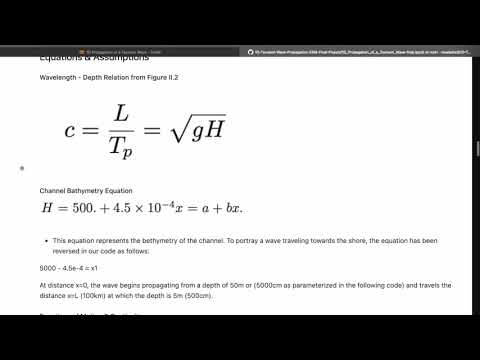

In [18]:
from IPython.display import YouTubeVideo

YouTubeVideo('9NkdLjgIP10', width=640, height=360)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j0
import scipy

### Introduction

We have chosen to base our project off of the paper *Introduction to Numerical Modeling of Tsunami Waves* by Dr. Z. Kowalik, published in 2012. This study takes an in-depth approach to understanding and modeling the characteristics of motion of a real-world long wave, such as a tsunami wave. In this project, we set out to define some of the fundemental relationships between characteristics of long waves and how the motion of waves is influenced by these characteristics and external forces, including channel depth.  

The main focus of this project is to study the propagation and energy dynamics of long waves in a confined channel using numerical methods. This includes: Understanding how waves behave in a 1D system under idealized and realistic conditions. Testing and validating numerical methods to solve the shallow water equations, including the effects of boundary conditions and numerical dissipation. In addition, we will be examining how physical factors like bathymetry, wave amplitude, and nonlinearity influence wave motion.


Understanding the propagation of long waves, such as tsunamis, is critical for predicting and mitigating the devastating impacts these waves can have on coastal regions. Long waves are characterized by their significant wavelengths relative to the depth of the water, allowing them to traverse vast distances with minimal energy loss. Their behavior in confined channels, such as harbors, fjords, or coastal inlets, is of particular interest due to the potential for resonance, energy amplification, and complex boundary interactions.
This project focuses on the numerical modeling of long wave propagation in a one-dimensional channel. While analytical solutions provide valuable insights for idealized cases, real-world scenarios often require numerical methods to account for complexities such as nonlinearities, varying bathymetry, and boundary effects. By using numerical simulations, we can investigate wave dynamics in scenarios that are difficult to solve analytically, such as interactions with reflective or radiative boundaries, energy dissipation, and resonance phenomena.
The goal of this project is to explore the behavior of long waves in a simplified one-dimensional system, examining how physical parameters, boundary conditions, and numerical methods influence wave propagation and energy dynamics. Through simulations, this study seeks to provide a deeper understanding of long wave behavior in constrained environments, offering insights that can be extended to real-world applications, including tsunami modeling and coastal engineering.


### Figure II.1 Signal propagating from the point x = x1, t = 0 along the characteristics x1 − ut=const and x1 + ut =const

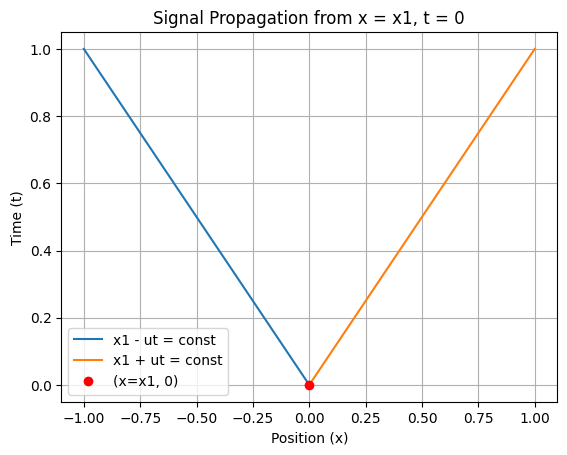

In [ ]:
# Define Parameters

x1 = 0
u = 1

t_values = np.linspace(0, 1, 100)

# Functions for two Lines

x_neg = x1 - u * t_values
x_pos = x1 + u * t_values

plt.plot(x_neg, t_values, label='x1 - ut = const')
plt.plot(x_pos, t_values, label='x1 + ut = const')
plt.plot(x1, 0, 'ro', label='(x=x1, 0)')

plt.ylabel('Time (t)')
plt.xlabel('Position (x)')
plt.title('Signal Propagation from x = x1, t = 0')
plt.legend()
plt.grid(True)
plt.show()

The purpose of Figure II.1 is to illustrate the fundemental mechanics of a tsunami wave. It portrays the basic concept that a signal will propagate outward from a point of origin proportional to its initial velocity (in this case *u(t)*) equally and oppositely. The derivative of *u(t)* can be taken and manipulated to derive a relation between wave speed *c* and ocean depth:

c = L/T = sqrt(gH) --> where L is wavelength, T is period, g is gravity and H is ocean depth

### Figure II.2 Wavelength of tsunami waves in the depth varying ocean.

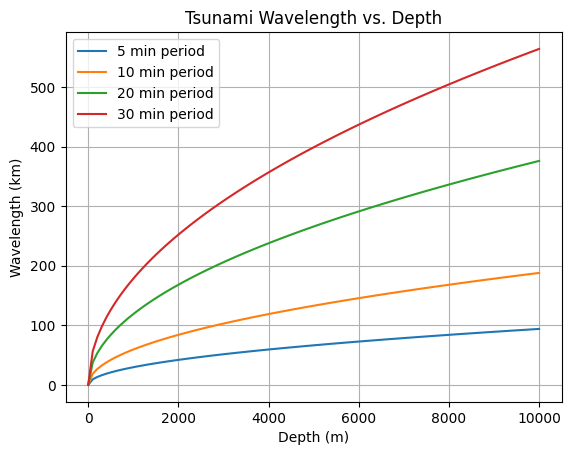

In [ ]:
g = 9.81
depths = np.linspace(0, 10000, 100)
periods = [5, 10, 20, 30]

for period in periods:
  wavelengths = np.sqrt(g * depths) * period * 60 / 1000
  plt.plot(depths, wavelengths, label=f'{period} min period')

plt.xlabel('Depth (m)')
plt.ylabel('Wavelength (km)')
plt.title('Tsunami Wavelength vs. Depth')
plt.legend()
plt.grid(True)
plt.show()

Figure II.2 is the result of using the wavespeed-seafloor relation explained earlier used to calculate the wavelength of a tsunami wave at varying depth and with varying periods.
- This figure demonstrates a direct positive relationship between the wave period and wavelength.
- It also demonstrates a direct positive relationship between depth and wavelength.

These relationships help to create the foundation of real-life tsunami wave propagation as a wave moves towards shore from open sea. Numerical and analytical modeling of a tsunami wave using upwind scheme advection and the 0th order bessel function (respectively) will demonstrate the physical relationships defined above, and how they materialize in a realistic scenario.

### Equations & Assumptions

##### Wavelength - Depth Relation from Figure II.2

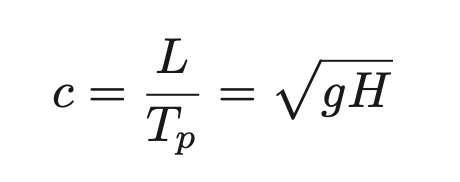

##### Channel Bathymetry Equation

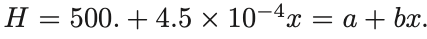

- This equation represents the bethymetry of the channel. To portray a wave traveling towards the shore, the equation has been reversed in our code as follows:

 5000 - 4.5e-4 = x1

 At distance x=0, the wave begins propagating from a depth of 50m or (5000cm as parameterized in the following code) and travels the distance x=L (100km) at which the depth is 5m (500cm).

##### Equations of Motion & Continuity
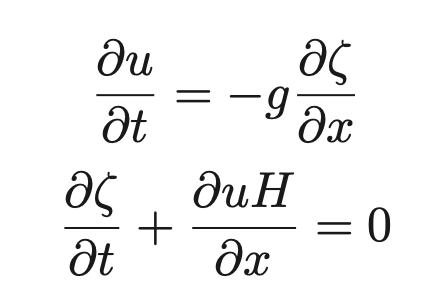


- The equations defined above are the equations of motion *(top)* and continuity *(bottom)* for a frictionless fluid defined by Kowalik.

 **Motion Equation**
  - Simplified form of the momentum equation derived from the shallow water equation.
  - The left term describes the rate of change of velocity horizontally as it changes in response to forces acting on the water column.
  - The right term expresses the effect of gravitational acceleration on the rate of change of sealevel height. This term accounts for the gravitational force driving the flow due to the slope of the water surface. *Water accelerates from regions of higher elevation to lower elevation.*

 **Continuity Equation**
  - Represents the conservation of mass. It states that the change in water height is related to the horizontal velocity of the water. H can be substituted for the bathymetry equation above for further derivation in order to arrive at our final PDE.
  - The continuity equation is implemented indirectly through the numerical advection scheme, where changes in wave amplitude and bathymetry-dependent speed account for conservation of mass.
  - In our code, the variable *c*, the depth-dependent wave speed, is used to tie amplitude changes to the bathymetry equation.

##### Wave Propagation PDE

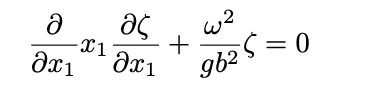

- This equation has been derived from the both equations of motion and continuity outlined above. Propagation with the velocity term eliminated. ζ represents that sealevel height as it undergoes deformation by a tsunami wave and it is influenced by the term w^2/gb^2 which is defined as *k* in the following shallow wave equation. The partial derivative of sealevel height to the left of the equation is dependent on the term x1 which represent the solution to the bathymetry equation along each point of the channel.

##### Shallow Wave Propagation

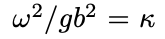

- This equation is the shallow wave equation where w = 2π / T *The period T has been defined in the paper as 5 min (300 sec) and b is the constant (slope) from the bathymetry equation.*

##### Solution to Wave PDE

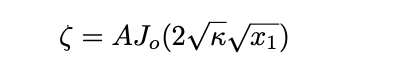

- This equation is the analytical solution of the PDE above using the 0th order Bessel function denoted as *J0* . In this equation, sealevel height is equal to the 0th order Bessel function of the quantity: twice the square root of the product of the shallow wave equation and the square root of the bathymetry equation, scaled by the initial amplitude of the wave (which in our case is 100cm).

### Numerical Methods and Boundary Conditions

The **numerical method** for wave advection leverages a finite difference approach to solve the continuity and motion equations, discretizing the spatial and temporal derivatives. The scheme ensures that the wave height and velocity fields are updated consistently, accounting for the advection of both the water surface height and horizontal velocity. By coupling bathymetry effects with finite difference approximations, the model captures the essential dynamics of tsunami waves, including their propagation, energy transfer, and interaction with a gradually shallowing slope.
- We have chosen to use the basic first order **upwind scheme** to numerically model the propogation of a tsunami wave.
This approach uses information about the direction of wave propagation (or flow) to select which neighboring values are used to approximate spatial derivatives. This ensures that the numerical solution respects the flow of information, improving stability in cases with advection.

**Boundary conditions** are implemented to maintain physical accuracy. Similar to Kowalik, wa have chosen the **Neumann (zero-gradient) open boundary conditions** applied at both ends of the domain, allowing waves to propagate without artificial reflections:

    J_next[0] = 0
    J_next[-1] = 0
This ensures that the simulation replicates the behavior of outgoing waves at open boundaries, independent of any reflection or dempening that may arise in a closed channel. This allows for relative simplicity of the model, which more transparently portrays the relationship between the behaviors of wave propagation and the bathymetry of the channel along which it travels.

In [ ]:
# Define Parameters

a = 5000  # depth at x=0 in cm (50 m)
b = -4.5e-4  # slope of the depth in cm/km (negative for decreasing depth)
g = 981  # gravity in cm/s^2
b2 = b**2 # b^2
T = 300  # wave period in seconds
w = 2 * np.pi / T
k = w**2 / (g * b2) # shallow water wave equation
A = 100  # wave amplitude in cm
L = 100 # length of channel (km)
Nx = 4000 #number of spatial grid points

# Numerical grid

dx = 25  # spatial step in meters
dt = 0.1  # time step in seconds
x_km = np.linspace(0,L,Nx)
x_cm = x_km * 1e5
x1 = a + b * x_cm  # depth variation

Above are the parameters used to numerically and analytically model the 1D propagation of a tsunami wave with respect to the initial conditions outlined by Kowalik.
- The bathymetry equation describes the gradual decrease in channel depth as the wave approaches 100 km is as follows:

  x1 = a - (b)x_cm --> where the x=0 occurs at depth 5000 cm (50 m) and x=L [100 km] occurs at depth 500 cm (5 m)

- The shallow wave equation describes the motion of the wave in this model and is defined by the relation in the equations section of the project.

- The numerical grid is defined by dx and dt which are the spacial and time steps valued above over a grid of length L, over which there are 4000 spacial steps as defined by Nx. A is the starting amplitude of the wave.

### Figure II.15 Numerical (upper panel) and analytical (lower panel) solutions for the wave traveling up the sloping channel.

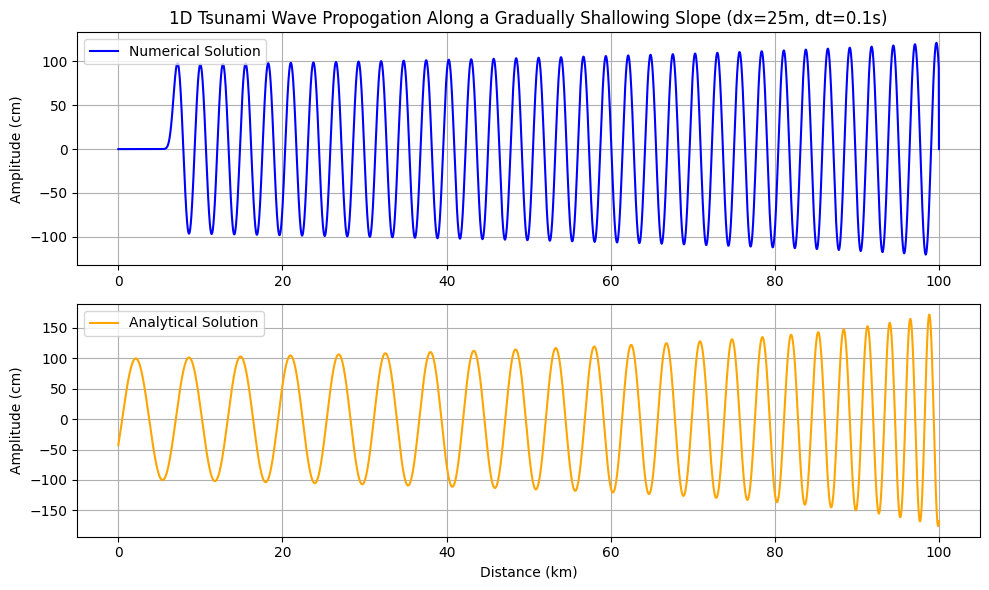

In [13]:
# Analytical solution

analytical = A * 18 * j0(2 * np.sqrt(k) * np.sqrt(x1))

# Numerical Advection

numerical = np.zeros_like(x_km)
J_prev = np.zeros_like(x_km)  # Previous time step
J_curr = np.zeros_like(x_km)  # Current time step

# Initial condition: sinusoidal wave

J_curr = A * 1.4 * np.sin(k * x_km)

# Time-stepping loop

Nt = int(T / dt)
for _ in range(Nt):
    J_next = np.zeros_like(J_curr)
    for i in range(0, len(x_km) - 1):
        c = np.sqrt((g/100) * (x1[i]/100))  # wave speed dependent on channel bathymetry converted to m/s
        J_next[i] = J_curr[i] - (c * dt / dx) * (J_curr[i] - J_curr[i - 1])


    # apply Neumann (Zero-gradient) open boundary condition

    J_next[0] = 0
    J_next[-1] = 0

    # update wave field

    J_prev, J_curr = J_curr, J_next


# Assign the numerical solution after the loop

numerical = J_curr

plt.figure(figsize=(10, 6))


# Numerical solution

plt.subplot(2, 1, 1)
plt.plot(x_km, numerical, label="Numerical Solution", color="blue")
plt.title("1D Tsunami Wave Propogation Along a Gradually Shallowing Slope (dx=25m, dt=0.1s)")
plt.ylabel("Amplitude (cm)")
plt.grid()
plt.legend()

# Analytical solution

plt.subplot(2, 1, 2)
plt.plot(x_km, analytical, label="Analytical Solution", color="orange")
plt.xlabel("Distance (km)")
plt.ylabel("Amplitude (cm)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Figure II.16 Comparison of the analytical and numerical solutions after wave traveled 94km up the channel.

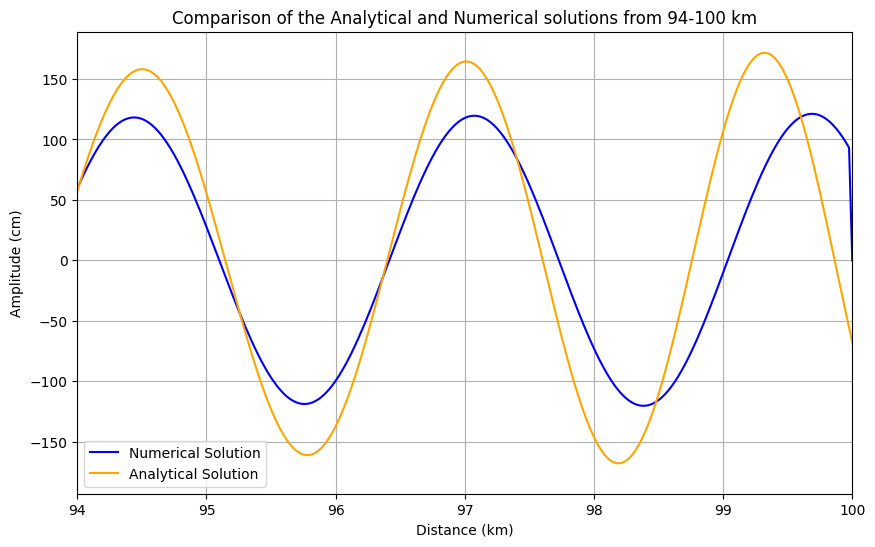

In [12]:
# Analytical and Numerical Solutions superimposed to reveal error in Advection Method

start_index = np.where(x_km >= 90)[0][0]
end_index = np.where(x_km <= 100)[0][-1]


plt.figure(figsize=(10, 6))
plt.xlim(94,100)
plt.plot(x_km[start_index:end_index+1], numerical[start_index:end_index+1], label="Numerical Solution", color="blue")
plt.plot(x_km[start_index:end_index+1]+0.5, analytical[start_index:end_index+1], label="Analytical Solution", color="orange")
plt.xlabel("Distance (km)")
plt.ylabel("Amplitude (cm)")
plt.title("Comparison of the Analytical and Numerical solutions from 94-100 km")
plt.grid(True)
plt.legend()
plt.show()

### Results
##### In this project, we carried out first order numerical advection on a general *sin wave* using the shallow wave equation to simulate the 1D propagation of tsunami wave across a channel that is gradually shallowing as the wave approaches the shore. We also compared this to an analytical model of a wave using the 0th order bessel function. Finally, we superimposed both methods on the same plot over the last 6 km of propagation to visualize the potential error in the numerical method.
- To analyse and understand the results, we can start by looking at the analytical solution in figure II.15. This figure is a representation of the 1D wave manipulation of the solution of the space derivative of the continuity function (carried out in the paper) by the 0th order bessel function.
  - The space derivative is the following equation:
  (d/dx1)x1(dC/dx1) + (w^2/gb^2)C = 0 where 'd' is a partial derivative

  - The solution to the space derivative is as follows:
  C = AJ0(2sqrt(k)sqrt(x1)) where A is amplitude, J0 is the 0th order bessel function and x1 is the bathymetry equation for the channel.

- The analytical solution reproduction was mostly consistent with the solution in the paper. The main difference being the multiplication by an arbitrary factor of *18* so that the wave amplitude started at 100cm. This accounted for dampening that likely took place within the calculations done in scipy.special.j0 It can be seen that the wave gradually decreases in wavelength and increases in amplitude with respect to the shallowing of the channel. The decrease in ocean depth as the tsunami wave propagates to the shore causes wave deformation in the form of vertical stretching and horizontal compression as the direction of energy of the wave is diverted from initially horizontal to vertical. Over the distance of the 100km channel, the wave increases amplitude by roughly 75cm, 175% its original amplitude. The wavelength also decreases by a factor of roughly 2-3 times its original length.

- The numerical solution reproduction was generally consistent with the solution in the paper but had multiple errors that caused it to differ in critical aspects. This was created by using the upwind scheme (which is a first order finite difference method). The boundary conditions were the zero-gradient (Neumann) boundary conditions used in the paper for an open channel. The biggest eye-catching error involves the very begining of the wave propagation. In the figure, the wave does not appear to begin propagation until roughly 6 km into its journey. Given that the article we referenced skipped multiple steps and did not explicitly state how the initialized the code for this figure, the error likely originates from 2 places:
  1. The Courant Number defined above as c * dt/dx varies with respect to the c value, which also varies with respect to the bathymetry equation defined by x1. Because of this, the value of the Courant number may influence the left boundary of the wave, causing the numerical model to portray significant dampening to the wave before the method stabilizes. Multiple adjustments were made intermittantly, including decreasing the dt time step to 0.05 and increasing the Nx (number of spacial steps) by a factor of 2 while decreasing the dx (length of spacial step) proportionally. Unfortunately, neither of these adjustments resolved the issue and only ended up in the code taking 5 or more minutes to run. We hypothesize that these adjustments in resolution might need to be made in tandem with a second order approximation added to the main line of code within the time-stepping loop.
  2.  The code used by Kowalik in the paper includes an advection method different from ours. It is possible that Kowalik used the Lax-Wendroff scheme, which offers better stabilization of oscillations. It is possible that our usage of upwind scheme introduces numerical diffusion that causes the anomaly at the beginning of wave propagation. We chose to stick with the upwind scheme because, unlike the Lax-Wendroff scheme, is more dependent on the bathymetry of the channel and more accurately shows the deformation of the tsunami wave as it approaches the shore.

  However, the numerical solution does show how the propagation of a wave is influenced by the gradual shallowing of the channel. In this model, the wave is defined as Asin(kx) where A is the original amplitude 100cm and k represents the shallow wave equation: k = w^2/gb^2. This model succeeds in portraying the effect of a shallowing channel on the vertical deformation of the wave, but it fails to show the change in wavelength seen in the analytical solution.

- A comparison between the two solutions as seen in figure II.16 shows the error in the numerical method over the last 6 km of wave propagation. After a period shift of 0.5 to the right of the analytical solution, synced crests and troughs show two main differences. The analytical model of the wave at this point in the channel has both a shorter wavelength and a greater amplitude than the numerical model. As seen in the side-by-side comparison, the numerical model experiences less deformation on both accounts over its 100km propagation. What's interesting about the numerical model is that it is most accurate between 80-100 km down the channel. After further review of Kowalik's numeric model, it is possible that his initial condition is more complex than the simple *sin wave* used in our model. Manipulation not explicitly stated in the article has the potential to explain why upwind advection of a *sin wave* using the shallow wave equation undergoes less deformation than the analytical model, which is more accurate to real tsunami wave propagation.

Using upwind scheme advection and the 0th order bessel function to model 1D tsunami wave propagation has helped us to better understand the behavior of mechanical waves and their response to external forcing, such as the change in depth impacting the reflection of waves off of the sea-floor. This model could be improved by testing different second-order advection methods, in conjunction with increasing the resolution (decreasing time and spacial step sizes) which will minimize the likelihood of numerical or artificial diffusion.

### References

- Kowalik, Z. "Introduction to numerical modeling of tsunami waves." Institute of Marine Science University of Alaska, Fairbank (2012).